In [122]:
import pandas as pd
import numpy as np

data = pd.read_csv('CC GENERAL.csv').iloc[:, 1:].dropna()
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [123]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=3, n_init=15).fit(data)

In [124]:
from sklearn import preprocessing

data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)

In [125]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN().fit(scaled_data)

print(f'Метки кластеров: {set(clustering.labels_)}')
print(f'Количество кластеров: {len(set(clustering.labels_)) - 1}')
print(f'Процент наблюдений, которые кластеризовать не удалось: {list(clustering.labels_).count(-1) / len(list(clustering.labels_))}')

Метки кластеров: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
Количество кластеров: 36
Процент наблюдений, которые кластеризовать не удалось: 0.7512737378415933


In [126]:
print('''- Параметр "eps" - максимальное расстояние между двумя образцами, при котором один считается соседним с другим.
- Параметр min_samples" - количество выборок (или общий вес) в окрестности точки, которую следует рассматривать как основную точку. В том числе и сама точка.
- Параметр "metric" - метрика, используемая при расчете расстояния между экземплярами в массиве объектов.
- Параметр "metric_params" - дополнительные аргументы ключевого слова для метрической функции.
- Параметр "algorithm" - алгоритм, который будет использоваться модулем NearestNeighbors для вычисления поточечных расстояний и поиска ближайших соседей.
- Параметр "leaf_size" - размер листа передается в BallTree или cKDTree. Это может повлиять на скорость построения и запроса, а также на объем памяти, необходимой для хранения дерева.
- Параметр "p" - степень метрики Минковского, используемая для вычисления расстояния между точками.
- Параметр "n_jobs" - количество параллельных заданий для запуска.''')

- Параметр "eps" - максимальное расстояние между двумя образцами, при котором один считается соседним с другим.
- Параметр min_samples" - количество выборок (или общий вес) в окрестности точки, которую следует рассматривать как основную точку. В том числе и сама точка.
- Параметр "metric" - метрика, используемая при расчете расстояния между экземплярами в массиве объектов.
- Параметр "metric_params" - дополнительные аргументы ключевого слова для метрической функции.
- Параметр "algorithm" - алгоритм, который будет использоваться модулем NearestNeighbors для вычисления поточечных расстояний и поиска ближайших соседей.
- Параметр "leaf_size" - размер листа передается в BallTree или cKDTree. Это может повлиять на скорость построения и запроса, а также на объем памяти, необходимой для хранения дерева.
- Параметр "p" - степень метрики Минковского, используемая для вычисления расстояния между точками.
- Параметр "n_jobs" - количество параллельных заданий для запуска.


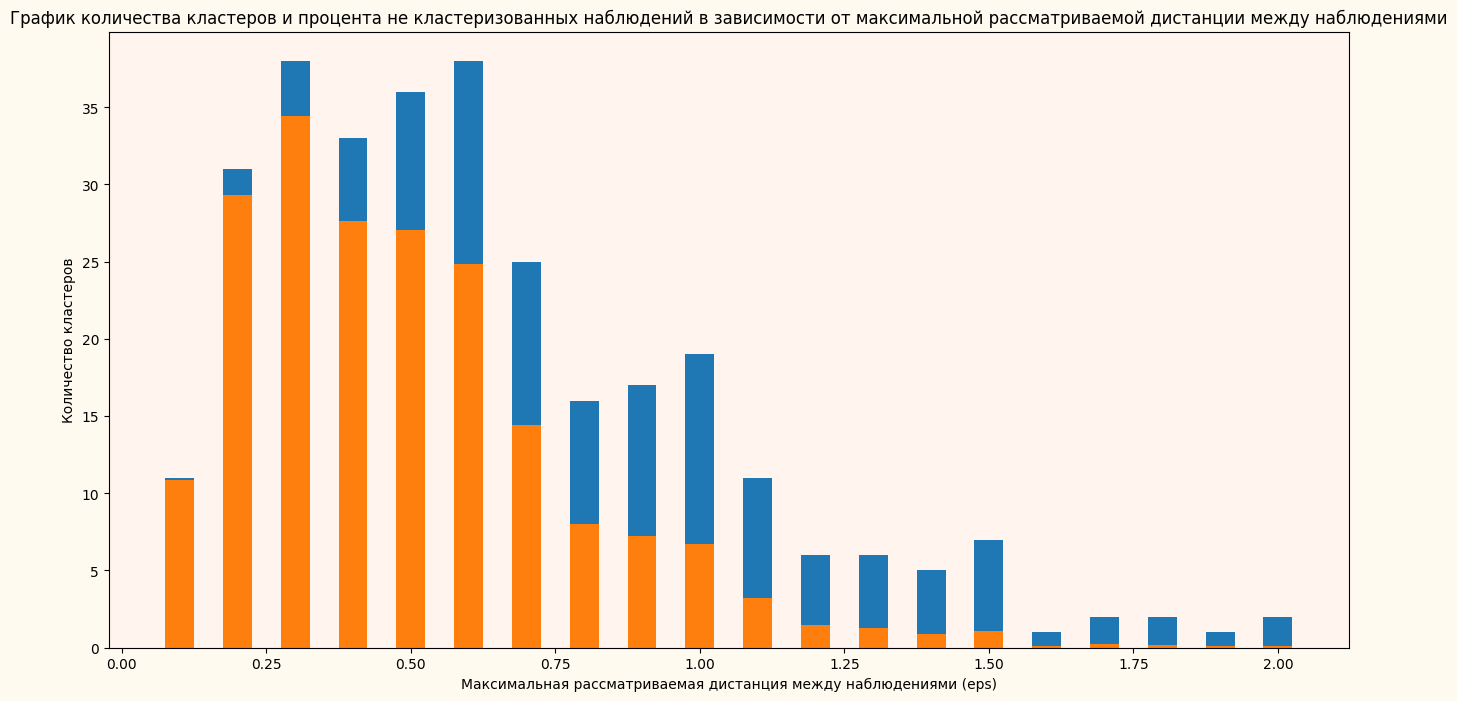

'Оранжевый столбец показывает процент не кластеризованных наблюдений от общего количества кластеров (синий столбец)'

In [127]:
import matplotlib.pyplot as plt

max_eps = 0
eps_list = []
count_clusters = []
percent_not_clusters_labels = []

while max_eps <= 2:
    max_eps += 0.1
    eps_list.append(max_eps)
    clustering = DBSCAN(eps=max_eps).fit(scaled_data)
    count_clusters.append(len(set(clustering.labels_)) - 1)
    percent_not_clusters_labels.append(
        (len(set(clustering.labels_)) - 1) * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

fig, ax = plt.subplots()
ax.bar(eps_list, count_clusters, width=0.05)
ax.bar(eps_list, percent_not_clusters_labels, width=0.05)

ax.set_facecolor('seashell')
fig.set_figwidth(16)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Максимальная рассматриваемая дистанция между наблюдениями (eps)')
plt.ylabel('Количество кластеров')
plt.title(
    label='График количества кластеров и процента не кластеризованных наблюдений в зависимости от максимальной рассматриваемой дистанции между наблюдениями',
    fontweight=12)

plt.show()

'Оранжевый столбец показывает процент не кластеризованных наблюдений от общего количества кластеров (синий столбец)'

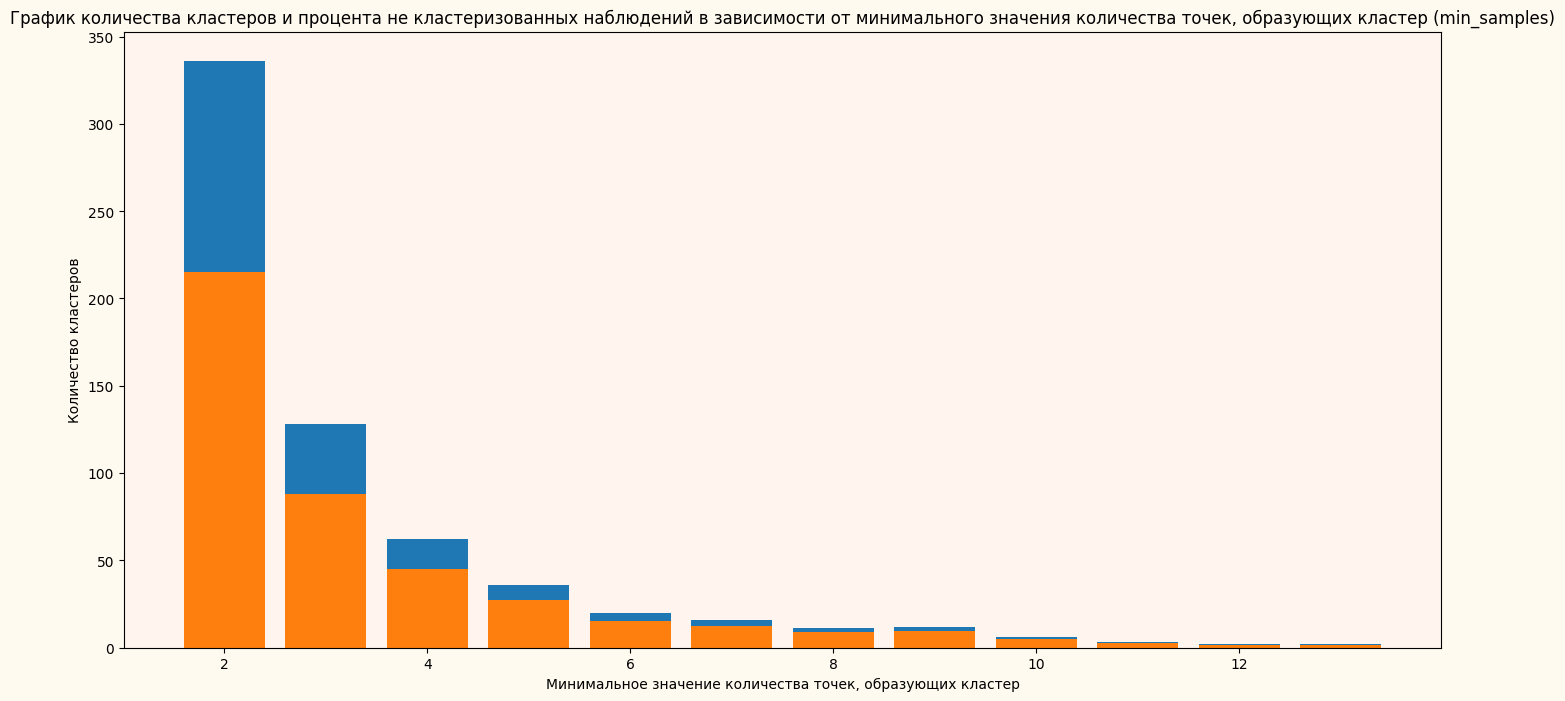

'Оранжевый столбец показывает процент не кластеризованных наблюдений от общего количества кластеров (синий столбец)'

In [128]:
min_samples = 1
samples_min_list = []
count_clusters = []
percent_not_clusters_labels = []

while min_samples <= 12:
    min_samples += 1
    samples_min_list.append(min_samples)
    clustering = DBSCAN(min_samples=min_samples).fit(scaled_data)
    count_clusters.append(len(set(clustering.labels_)) - 1)
    percent_not_clusters_labels.append(
        (len(set(clustering.labels_)) - 1) * list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

fig, ax = plt.subplots()
ax.bar(samples_min_list, count_clusters)
ax.bar(samples_min_list, percent_not_clusters_labels)

ax.set_facecolor('seashell')
fig.set_figwidth(17)
fig.set_figheight(8)
fig.set_facecolor('floralwhite')

plt.xlabel('Минимальное значение количества точек, образующих кластер')
plt.ylabel('Количество кластеров')
plt.title(
    label='График количества кластеров и процента не кластеризованных наблюдений в зависимости от минимального значения количества точек, образующих кластер (min_samples)',
    fontweight=12)

plt.show()

'Оранжевый столбец показывает процент не кластеризованных наблюдений от общего количества кластеров (синий столбец)'

In [129]:
clustering = DBSCAN(eps=2, min_samples=3).fit(scaled_data)

f'при eps=2 и min_samples=3 количество кластеров ровняется: {len(set(clustering.labels_)) - 1} и процент не кластеризованных составляет: {list(clustering.labels_).count(-1) / len(list(clustering.labels_)) * 100}%'

'при eps=2 и min_samples=3 количество кластеров ровняется: 6 и процент не кластеризованных составляет: 6.287633163501622%'